In [2]:
import os
os.chdir('../../')

In [3]:
from NN.CC import CC
from NN.common import *
import matplotlib.pyplot as plt
import numpy as np
from lib import dataset_loader, dataset_info, dataset_preprocessing, plot_utility
import seaborn as sns

In [4]:
DATASET = dataset_info.Dataset.IRIS
X, y = dataset_loader.LoadDataset(DATASET)
# preprocessing
X, y = dataset_preprocessing.preprocess_nn(DATASET, X, y)

def score_function(out,target):
    return accuracy(out,target,ClassificationPostprocessing.ONE_HOT)

In [7]:
def parameter_to_investigate(params, param_to_check, run_metadata_function, plot_sample=False):        
	mt = ModelDataCollector(CC, X, y, params)
	mt.gather_data(run_metadata_function)
	tr_error_list,_ = mt.get_error_curve()
	tr_score_list,_ = mt.get_score_curve()
	run_metadata = mt.get_run_metadata()

	res = mt.sensitivity_analysis([param_to_check])

	param_list = [run_metadata[i] for i in range(len(run_metadata)) if run_metadata.index(run_metadata[i]) == i]
	param_ids = [param_list.index(run_metadata[i]) for i in range(len(run_metadata))]
	metadata_ids = []
	for i in range(len(param_list)):
		metadata_ids.append([])
	for i in range(len(param_ids)):
		metadata_ids[param_ids[i]].append(i)

	# plot the first run for each metadata
	plot_utility.plot_multiple_learning_curves("CC train err over " + param_to_check, param_list, [tr_error_list[metadata_ids[i][0]] for i in range(len(metadata_ids))])
	plot_utility.plot_multiple_learning_curves("CC train score over " + param_to_check, param_list, [tr_score_list[metadata_ids[i][0]] for i in range(len(metadata_ids))])

	if plot_sample:
		for i in range(len(metadata_ids)):
			plot_utility.plot_single_learning_curve("CC IRIS" + param_to_check, tr_error_list[metadata_ids[i][0]], None, tr_score_list[metadata_ids[i][0]], None)
			print(param_to_check + ": {} -> error {:.3f} score {:.3f}".format(param_list[i], tr_error_list[metadata_ids[i][0]][-1], tr_score_list[metadata_ids[i][0]][-1]))

	plt.bar(param_list, res["tr_error_mean"], yerr=res["tr_error_std"], color=sns.color_palette("Blues_d", len(run_metadata)))
	plt.title("CC train err over {}".format(param_to_check))
	plt.show()

	plt.bar(param_list, res["tr_score_mean"], yerr=res["tr_score_std"], color=sns.color_palette("Blues_d", len(run_metadata)))
	plt.title("CC train score over {}".format(param_to_check))
	plt.show()


Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached


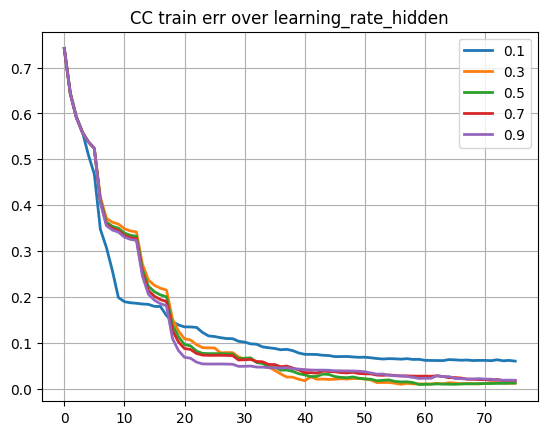

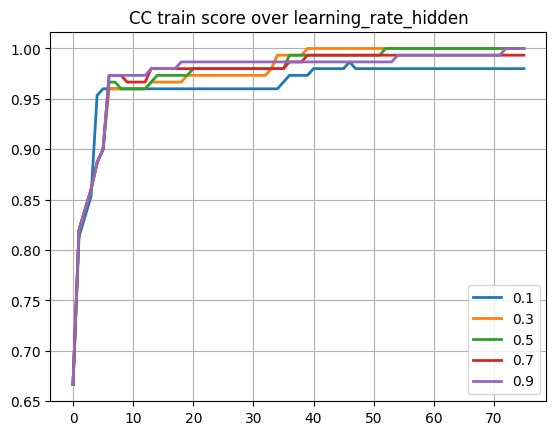

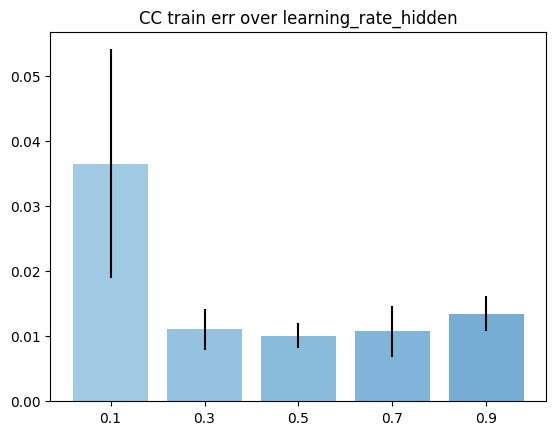

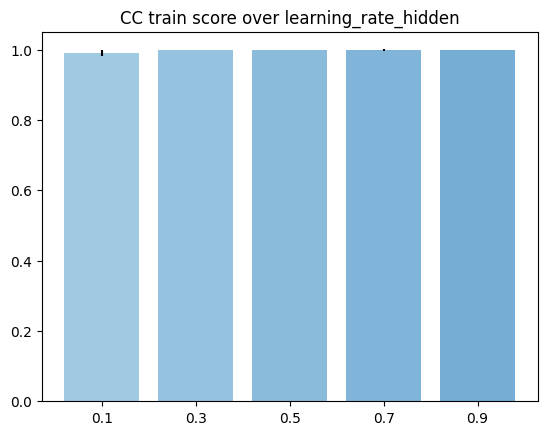

In [46]:
RUN_COUNT = 4
params = {
        'input_units' : [X.shape[1]],
        'output_units' : [y.shape[1]],
        'hidden_unit_activation_choices': [[ActivationFunction.TANH]],
        "max_hidden_nodes": [75],
        "momentum" : [0.4],
        'learning_rate': [0.1],
        'regularization': [0.002],
        'loss_function': [LossFunction.MEE],
        'max_intra_step_iterations' : [500],
        'rescaling': [True],
        'score_function': [score_function],
        'seed': list(range(RUN_COUNT)),
        'output_weigths_reset': [False],
        'learning_rate_hidden':[0.1, 0.3, 0.5, 0.7, 0.9],
        'momentum_hidden' : [0.1]
}

param_to_check = 'learning_rate_hidden'
def run_metadata_function(theta, tr_error, val_error, tr_score, val_score):
    f = theta[param_to_check]
    return "{}".format(f)
parameter_to_investigate(params, param_to_check, run_metadata_function)

Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached


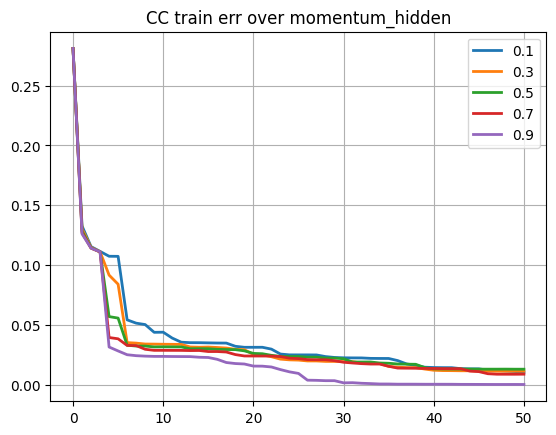

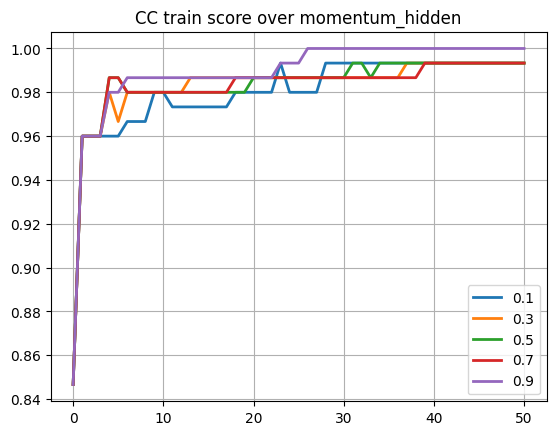

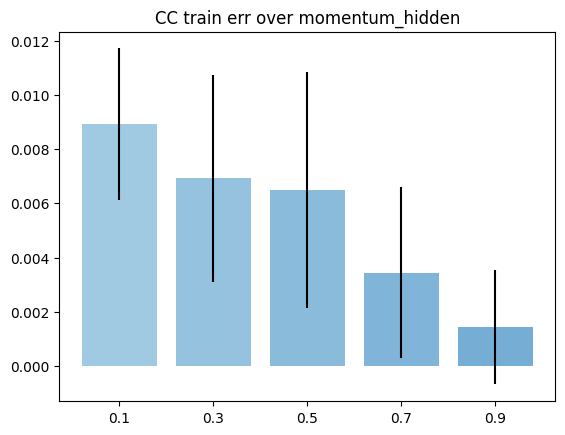

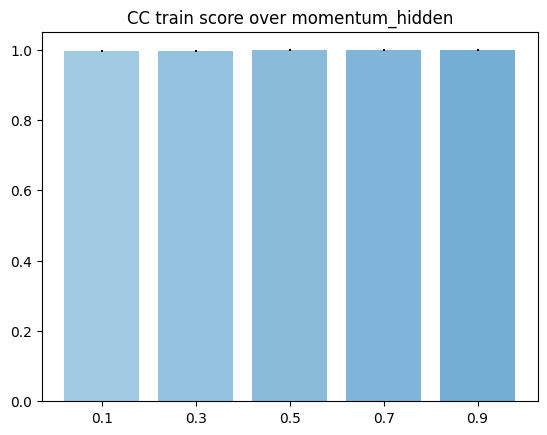

In [48]:
RUN_COUNT = 4
params = {
        'input_units' : [X.shape[1]],
        'output_units' : [y.shape[1]],
        'hidden_unit_activation_choices': [[ActivationFunction.TANH]],
        "max_hidden_nodes": [50],
        "momentum" : [0.4],
        'learning_rate': [0.03],
        'regularization': [0.002],
        'loss_function': [LossFunction.MSE],
        'max_intra_step_iterations' : [500],
        'rescaling': [True],
        'score_function': [score_function],
        'seed': list(range(RUN_COUNT)),
        'output_weigths_reset': [False],
        'learning_rate_hidden':[0.1],
        'momentum_hidden' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

param_to_check = 'momentum_hidden'
def run_metadata_function(theta, tr_error, val_error, tr_score, val_score):
    f = theta[param_to_check]
    return "{}".format(f)
parameter_to_investigate(params, param_to_check, run_metadata_function)

In [50]:
RUN_COUNT = 5

params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'output_activation_function' : [ActivationFunction.TANH],
    'hidden_unit_activation_choices': [[ActivationFunction.TANH]],
    "max_hidden_nodes": [30],
    "momentum" : [0.5],
    'learning_rate': [0.02],
    'learning_rate_hidden': [0.1, 0.3, 0.5, 0.7, 0.9],#
    'momentum_hidden':[0.0],#
    'regularization': [0.0],
    'regularization_hidden': [0.01],# prevents overflows
    'loss_function': [LossFunction.MSE],
    'nodewise_train_patience': [5],
    'nodewise_train_min_improvement': [0.0001],
    'max_intra_step_iterations' : [1000],
    'hid_min_step': [0.0001],
    'hid_patience': [10],
    'weight_amplitude': [0.4],
    "score_function" : [score_function],
    'rescaling': [True],
    'output_weigths_reset' : [True],
    'seed' : [i for i in range(RUN_COUNT)]
}

def run_name_function(theta, tr_error, val_error, tr_score, val_score):
    f = theta['learning_rate_hidden']
    return f

mt = ModelDataCollector(CC, X, y, params)
mt.gather_data(run_name_function)
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()

Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Nodewise epochs early stop
Training error did not improve and delta was small for 5 epochs
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Nodewise epochs early stop
Training error did not improve and delta was small for 5 epochs
Nodewise epochs early stop
Training error did not improve and delta was small for 5 epochs
Nodewise epochs early stop
Training error did not improve and delta was small for 5 epochs
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum numb

{'tr_error_mean': array([0.06952157, 0.04343034, 0.03339169, 0.02655841, 0.0260787 ]), 'val_error_mean': None, 'tr_score_mean': array([0.96266667, 0.96933333, 0.97733333, 0.98666667, 0.98666667]), 'val_score_mean': None, 'tr_error_std': array([0.01739407, 0.0034404 , 0.00104948, 0.00165573, 0.00092454]), 'val_error_std': None, 'tr_score_std': array([0.00326599, 0.00326599, 0.00533333, 0.        , 0.        ]), 'val_score_std': None, 'global_tr_error_mean': 0.039796143041219326, 'global_val_error_mean': None, 'global_tr_score_mean': 0.9765333333333335, 'global_val_score_mean': None, 'global_tr_error_std': 0.018001772505019796, 'global_val_error_std': None, 'global_tr_score_std': 0.00999911107160144, 'global_val_score_std': None}


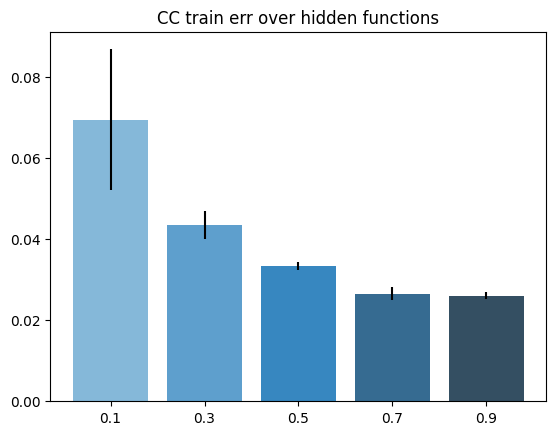

In [51]:
res = mt.sensitivity_analysis(["learning_rate_hidden"])
print(res)

plt.bar([str(el) for el in params['learning_rate_hidden']], res["tr_error_mean"], yerr = res["tr_error_std"], color = sns.color_palette("Blues_d", len(params['learning_rate_hidden'])))
plt.title("CC train err over hidden functions")
plt.show()

In [52]:
RUN_COUNT = 5

params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'output_activation_function' : [ActivationFunction.TANH],
    'hidden_unit_activation_choices': [[ActivationFunction.TANH]],
    "max_hidden_nodes": [30],
    "momentum" : [0.5],
    'learning_rate': [0.02],
    'learning_rate_hidden': [0.1],#
    'momentum_hidden':[0.1, 0.3, 0.5, 0.7, 0.9],#
    'regularization': [0.0],
    'regularization_hidden': [0.01],# prevents overflows
    'loss_function': [LossFunction.MSE],
    'nodewise_train_patience': [5],
    'nodewise_train_min_improvement': [0.0001],
    'max_intra_step_iterations' : [1000],
    'hid_min_step': [0.0001],
    'hid_patience': [10],
    'weight_amplitude': [0.4],
    "score_function" : [score_function],
    'rescaling': [True],
    'output_weigths_reset' : [True],
    'seed' : [i for i in range(RUN_COUNT)]
}

def run_name_function(theta, tr_error, val_error, tr_score, val_score):
    f = theta['momentum_hidden']
    return f

mt = ModelDataCollector(CC, X, y, params)
mt.gather_data(run_name_function)
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()

Maximum number of hidden nodes reached
Nodewise epochs early stop
Training error did not improve and delta was small for 5 epochs
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Nodewise epochs early stop
Training error did not improve and delta was small for 5 epochs
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Nodewise epochs early stop
Training error did not improve and delta was small for 5 epochs
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden nodes reached
Maximum number of hidden 

{'tr_error_mean': array([0.06960978, 0.06824085, 0.05618794, 0.06558461, 0.07437549]), 'val_error_mean': None, 'tr_score_mean': array([0.95866667, 0.96133333, 0.96266667, 0.96133333, 0.96133333]), 'val_score_mean': None, 'tr_error_std': array([0.01284911, 0.01551006, 0.0032741 , 0.00944695, 0.01825529]), 'val_error_std': None, 'tr_score_std': array([0.00498888, 0.00498888, 0.00326599, 0.00653197, 0.00498888]), 'val_score_std': None, 'global_tr_error_mean': 0.06679973241551705, 'global_val_error_mean': None, 'global_tr_score_mean': 0.9610666666666667, 'global_val_score_mean': None, 'global_tr_error_std': 0.014285193343327857, 'global_val_error_std': None, 'global_tr_score_std': 0.005225578117937447, 'global_val_score_std': None}


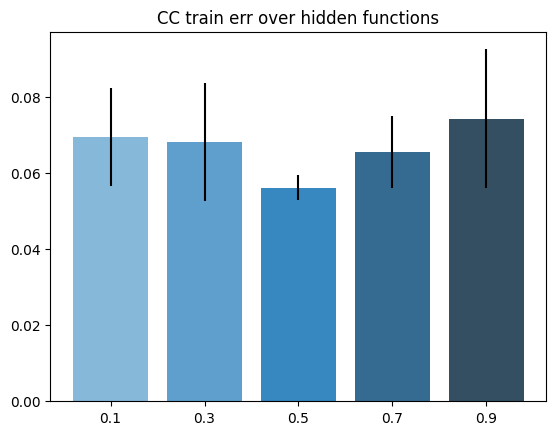

In [53]:
res = mt.sensitivity_analysis(["momentum_hidden"])
print(res)

plt.bar([str(el) for el in params['momentum_hidden']], res["tr_error_mean"], yerr = res["tr_error_std"], color = sns.color_palette("Blues_d", len(params['momentum_hidden'])))
plt.title("CC train err over hidden functions")
plt.show()